# Word Intrusion Setup & Analysis
For the 100-topic model, we need 8 variations of 10 tasks (80 surveys of 10), for 30, we need 8 variations of 3 tasks (24 surveys of 3).

In [2]:
%matplotlib inline

from pathlib import Path
import os
import subprocess

import pandas as pd
import numpy as np

from collections import Counter
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
import pylab as pl
from IPython.core.display import display, HTML

import sklearn
import sklearn.model_selection
import sklearn.linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

import spacy

import pyLDAvis
import gensim
import logging

/home/srivbane/shared/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
saved_data_dir = "/home/srivbane/shared/caringbridge/data/projects/sna-social-support/support_modeling"
lda100 = gensim.models.LdaModel.load(os.path.join(saved_data_dir, "lda/gb_1000000_lda_100t.model"))
lda30 = gensim.models.LdaModel.load(os.path.join(saved_data_dir, "lda/gb_1000000_lda_30t.model"))
#dct100 = gensim.corpora.Dictionary.load(os.path.join(saved_data_dir, "lda/gb_100t_dict.pkl"))
#dct30 = gensim.corpora.Dictionary.load(os.path.join(saved_data_dir, "lda/gb_30t_dict.pkl"))

In [3]:
gbs = pd.read_hdf('data/classified_gbs.h5', key='gbs')
gbs.head()

,user_id,site_id,int_type,created_at,updated_at,journal_oid,site_index,is_nontrivial,is_self_interaction,body_text,tokens,pred_label,pred_prob_neutral,pred_prob_supportive,support_discretized
540271,355936,11900,guestbook,1184103659000,1184103659000,,-1.0,True,False,"For all the help the medical community can be,...","[For, all, the, help, the, medical, community,...",1,0.331490,0.668510,False
3609373,1884841,119180,guestbook,1251075969000,1251075969000,,-1.0,True,False,Kylee: I love the story. Next time just try ...,"[Kylee, :, , I, love, the, story, ., , Nex...",1,0.232435,0.767565,True
4325045,1195944,55715,guestbook,1197856577000,1197856577000,,-1.0,True,False,What an honor to be the very first person to s...,"[What, an, honor, to, be, the, very, first, pe...",1,0.182593,0.817407,True
5414881,6773640,57152,guestbook,1301181775000,1301181775000,,-1.0,True,False,"Home is the best place to be, think about you ...","[Home, is, the, best, place, to, be, ,, think,...",0,0.584396,0.415604,False
1726463,15515585,186646,guestbook,1335786062000,1335786062000,,-1.0,True,False,I was reading the words - we can never go back...,"[I, was, reading, the, words, -, we, can, neve...",0,0.550263,0.449737,False


In [16]:
topics = lda100.show_topics(100, num_words=100, formatted=False)

In [17]:
tops = []
bots = []
for topic in topics:
    w2p = [x[0] for x in topic[1] if not x[0].isspace()]
    tops.append(w2p[:20])
    bots.append(w2p[-5:])

In [18]:
#https://stackoverflow.com/questions/17864466
def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

In [19]:
for i, b in enumerate(bots):
    t = tops.copy()
    del t[i]
    tops_elsewhere = flatten(t)
    for bw in b:
        if bw not in tops_elsewhere:
            b.remove(bw)

In [20]:
from random import sample
citizens = []
for t, b in zip(tops, bots):
    for i in range(0, 8):
        this = []
        this.extend(sample(t, 5))
        this.extend(sample(b, 1))
        citizens.append(this)

In [21]:
df = pd.DataFrame(citizens, columns=["C1", "C2", "C3", "C4", "C5", "I"])
df["for_topic"] = [int(x/8) for x in range(0,800)]

In [23]:
df.to_csv("pilot_100t.csv")

In [24]:
topics = lda30.show_topics(30, num_words=100, formatted=False)

In [25]:
tops = []
bots = []
for topic in topics:
    w2p = [x[0] for x in topic[1] if not x[0].isspace()]
    tops.append(w2p[:20])
    bots.append(w2p[-5:])

In [26]:
#https://stackoverflow.com/questions/17864466
def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

In [27]:
for i, b in enumerate(bots):
    t = tops.copy()
    del t[i]
    tops_elsewhere = flatten(t)
    for bw in b:
        if bw not in tops_elsewhere:
            b.remove(bw)

In [28]:
from random import sample
citizens = []
for t, b in zip(tops, bots):
    for i in range(0, 8):
        this = []
        this.extend(sample(t, 5))
        this.extend(sample(b, 1))
        citizens.append(this)

In [29]:
df = pd.DataFrame(citizens, columns=["C1", "C2", "C3", "C4", "C5", "I"])
df["for_topic"] = [int(x/8) for x in range(0,240)]

In [30]:
df.to_csv("pilot_30t.csv")

### Analysis

In [9]:
filled_df = pd.read_csv("pilot_100t_an.csv", names = ["index", "C1", "C2", "C3", "C4", "C5", "I", "topic", 
                                                        "w1", "u1", "w2", "u2", "w3", "u3", "w4", "u4"])
filled_df = filled_df.replace("{}", np.nan)

In [19]:
comparisons = filled_df[["I", "topic", "w1", "w2", "w3"]][:800]

In [33]:
bools = comparisons[["I", "w1", "w2", "w3"]][:800]
one = bools["I"] == comparisons["w1"]
two = bools["I"] == comparisons["w2"]
three = bools["I"] == comparisons["w3"]
answers = one.append(two).append(three)


In [21]:
from collections import Counter

In [29]:
Counter(answers)

Counter({False: 2247, True: 153})

In [30]:
153/2247

0.06809078771695594

In [39]:
t = pd.DataFrame(comparisons.topic.append(comparisons.topic).append(comparisons.topic))
t['a'] = answers

In [51]:
c = Counter(t[t.a == True].topic)
x = [x for x in c.keys()]; y = [y for y in c.values()]

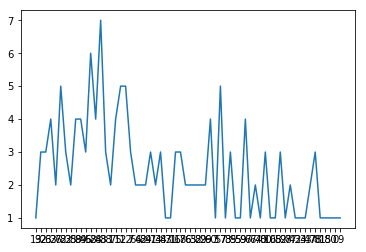

In [53]:
import matplotlib.pyplot as mpl
mpl.plot(x, y)

In [58]:
d_view = [ (v,k) for k,v in zip(c.keys(), c.values())]
d_view.sort(reverse=True)
for v,k in d_view:
    print("%s: %d" % (k,v))
    if v == 2:
        break

48: 7
58: 6
72: 5
57: 5
22: 5
11: 5
99: 4
97: 4
88: 4
75: 4
63: 4
60: 4
28: 4
92: 3
91: 3
85: 3
82: 3
80: 3
78: 3
7: 3
52: 3
46: 3
38: 3
34: 3
23: 3
17: 3
16: 3
89: 2


In [59]:
# 48 is incoherent, 58 is Names, 72 is incoherent, 57 is urls, 22 is symbols. Noisy